<a href="https://colab.research.google.com/github/henrykohl/Machine-Learning-demo-repo/blob/master/JamesLearningNote/3-5-DTreeRForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 決策樹(Decision Tree)以及隨機森林(Random Forest)介紹

[來源](https://medium.com/jameslearningnote/7079b0ddfbda)

# 載入必要函式以及Iris資料集

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


# 將資料的70%拿出來train，剩下的30％用來檢測train的好壞

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [ ]:
# 不需要做特徵標準化
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

# 載入決策樹函式，criterion使用entropy，也可以使用gini impurity，max_depth在實務上很常用到，主要是可以防止樹長得過高造成overfit，由於這個範例很簡單不設max_depth也可以正確分類

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# 寫個迴圈看一下預測結果，發現也全部預測正確了！另外也可以用score函數來計算正確率

In [ ]:
tree.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
error = 0
for i, v in enumerate(tree.predict(X_test)):
  if v!= y_test['target'].values[i]:
    print(i,v)
    error+=1
print(error)

0


In [ ]:
tree.score(X_test,y_test['target'])

1.0

# 視覺化決策樹的決策邊界

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    cols = list(X.columns)                           # 修改版本
    X = X.values                                # 修改版本

    # setup marker generator and color map
    markers = ('s', 'X', 'o', '^', 'v')                    # tuple 類型 (自行改成X，使用x有警告提示)
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                  np.arange(x2_min, x2_max, resolution))

    # Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)                # 原版本
    Z = classifier.predict(pd.DataFrame(np.array([xx1.ravel(), xx2.ravel()]).T, columns=cols)) # 修改版本

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
              y=X[y == cl, 1],
              alpha=0.6,
              # c=cmap(idx),                          # 有Warning~Python 3似乎使用ListedColormap有警告提示
              c=colors[idx],                          # 數據點的顏色
              edgecolor='black',
              marker=markers[idx],
              label=cl)

    # # highlight test samples
    # if test_idx:
    #     # plot all samples
    #     if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
    #         X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
    #         warnings.warn('Please update to NumPy 1.9.0 or newer')
    #     else:
    #         X_test, y_test = X[test_idx, :], y[test_idx]

    #     plt.scatter(X_test[:, 0],
    #           X_test[:, 1],
    #           c='',
    #           alpha=1.0,
    #           edgecolor='black',
    #           linewidths=1,
    #           marker='o',
    #           s=55, label='test set')

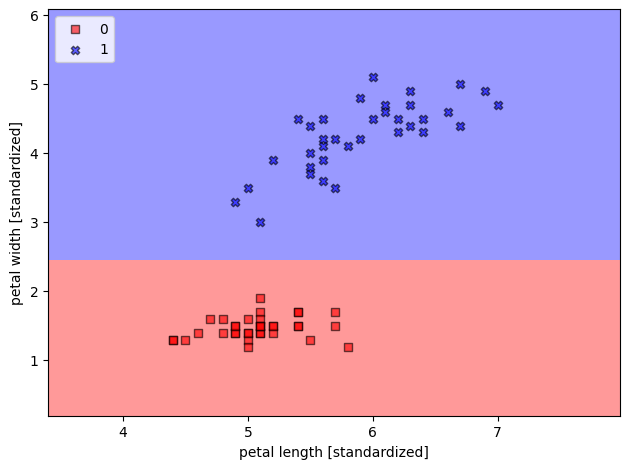

In [ ]:
# plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree) # 原版本，會產生...valid feature names...的警告提示
plot_decision_regions(X_train, y_train['target'].values, classifier=tree)      # 修改版本

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3.5-補1 使用export_graphviz函式來將樹的實際長相視覺化

若單獨執行<b>3.5-補1</b>，則需先執行<b>補1-1</b>與<b>3.5 plot_decision_regions</b>

In [ ]:
# 補1-1
# from sklearn import datasets
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

# from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# 此cell 不應該在此執行，移到後面
# export_graphviz(tree, out_file='tree.dot', feature_names=['sepal length (cm)','petal length (cm)'])


In [ ]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['petal width (cm)','petal length (cm)','target']]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,petal width (cm),petal length (cm),target
0,0.2,1.4,0
1,0.2,1.4,0
2,0.2,1.3,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# 應該移到此處
export_graphviz(tree, out_file='tree.dot', feature_names=['sepal length (cm)','petal length (cm)'])

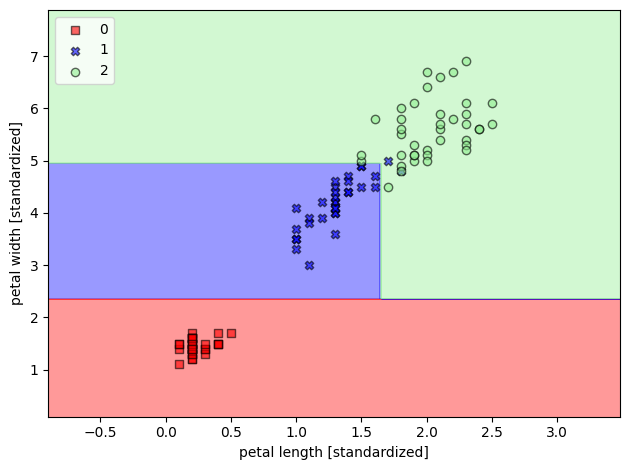

In [ ]:
# plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plot_decision_regions(X_train, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# RandomForest

In [ ]:
export_graphviz(tree, out_file='tree2.dot', feature_names=['sepal length (cm)','petal length (cm)'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=3,n_jobs=2) # n_estimators：樹木的多寡，n_jobs：決定要用幾個核心去算

In [ ]:
forest.fit(X_train,y_train['target'].values)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=3)

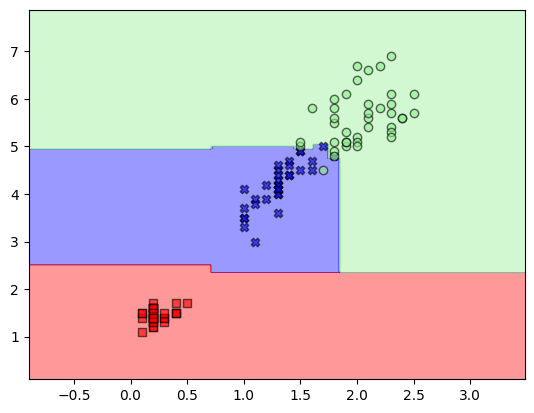

In [ ]:
# plot_decision_regions(X_train.values, y_train['target'].values, classifier=forest)
plot_decision_regions(X_train, y_train['target'].values, classifier=forest)



4.1>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

